# 1. Business Problem


## 1.1 Business Context


In the telecommunications industry, customer retention is critical for maintaining revenue and reducing the costs associated with acquiring new customers. High churn rates can negatively impact a company’s profitability, market reputation, and growth potential.

I use dataset **Telco Customer Churn**, provided by IBM, contains information about customer attributes and behaviors, aiming to address the challenge of predicting customer churn. By understanding which customers are at risk of leaving, companies can develop targeted retention strategies and improve overall customer satisfaction.

## 1.2 Objective of the ML Model

The primary objective is to develop a classification model that predicts whether a customer will churn (leave) or not based on their demographics, account information, and service usage. This will enable the business to identify at-risk customers and proactively implement retention measures.

Implementing this predictive model can lead to significant business benefits, such as:
- The cost of attracting new customers is often much higher than retaining existing ones. Accurately predicting which customers are at risk of leaving allows businesses to focus resources on the right audience.
- Analytical data from the model can help businesses accurately identify the reasons for customer dissatisfaction, thereby improving service quality.
- Based on the prediction, businesses can implement measures such as special offers, improve support quality, or provide personalized solutions to retain customers.
- Each retained customer will continue to contribute to a recurring revenue stream through contracts or subscription services.

## 1.3 Assumptions

- The dataset is representative of the current customer population.
- The relationship betIen the independent variables and churn remains consistent over time.

## 1.4. Dataset Description

The dataset provided includes customer data from the telecommunications industry, containing input features such as:

<b>Independent Variables</b>:
- Demographic Information:
Gender, age range, partner status, and dependents.
- Account Information: Contract type, payment method, and tenure.
- Service Usage: Subscription to internet services, phone lines, and additional features like online security, device protection, and streaming.

<b>Dependent Variable</b>: "Churn" (Yes/No), indicating whether a customer has left.

## 1.5. Key Metric: Recall

I select Recall for class 1 as the primary metric for evaluating our churn prediction model. This choice aligns with the business goal of accurately identifying customers likely to churn, which is critical for implementing targeted retention strategies.

Recall specifically measures the model's ability to correctly identify all churners (class 1), minimizing false negatives. Since failing to identify a potential churner can lead to missed opportunities for intervention, prioritizing Recall ensures the model effectively addresses this business priority.

A high Recall for class 1 indicates that the model successfully captures the majority of customers at risk of churning, enabling the business to allocate resources efficiently for customer retention. By prioritizing Recall for class 1, I ensure the model focuses on reducing churn effectively, directly supporting the overall business objective of maximizing customer retention and revenue.

## 1.6. Install Things

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
names = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
         'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
         'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
         'MonthlyCharges', 'TotalCharges', 'Churn']

# Đọc file CSV với các cột trên
df = pd.read_csv('/content/drive/MyDrive/DataMining /dataset.csv')

# In ra kích thước của dataset (số dòng và số cột)
print(df.shape)

# Xem 10 dòng cuối cùng của dataset
df.tail(10)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# 2. Preprocessing


## 2.1. Redundancy Check

The redundancy check ensures that the dataset does not contain duplicate rows, which could skew the analysis and model training. Duplicate data can distort insights and lead to biased predictions.

In [ ]:
def check_data_redundancy(data):
  duplication_rows = data[data.duplicated()]
  if not duplication_rows.empty:
    print("The duplications are found: \n")
    duplication_rows
    return data.drop_duplicates()
  else:
    print("No duplications.")
    return data

In [ ]:
df = check_data_redundancy(df)

No duplications.


The check confirmed that no duplicate rows exist in the dataset. This indicates that the data collection and preprocessing processes have maintained high standards of quality and integrity. As a result, no further action was required at this step.

## 2.2. Drop unnecessary feature

In this step, I remove column ***customerID*** from the dataset. This feature is not relevant to the analysis or predictive modeling because it is a unique identifier for each customer and does not contain any meaningful information for understanding customer behavior or predicting churn.

In [ ]:
df.drop('customerID', axis =1, inplace=True)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2.3. Convert object to numeric datatype

This step addresses the issue of incorrectly assigned data types within the dataset.

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

***We can see that the TotalCharges contain numbers but its dtype is Object --> We need to convert object to numeric datatype***

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

## 2.4. Check for missing value

In [ ]:
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)

Index(['TotalCharges'], dtype='object')


***We can see that only TotalCharges has missing value, we choose to drop all that rows***

In [ ]:
df['TotalCharges'].isnull().sum()

11

In [ ]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df = df.dropna(subset=['TotalCharges'])

In [ ]:
df['TotalCharges'].isnull().sum()

0

## 2.5. Feature Encoding

1. Label Encoding for features with 2 values ​​like gender, Partner, Dependents, etc.
2. One-Hot Encoding for features with multiple values ​​like InternetService, Contract, PaymentMethod, etc.

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### 2.5.1. Encoding Binary Features

In [ ]:
column_to_encode_LE = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
]

column_indices_LE = [X.columns.get_loc(col) for col in column_to_encode_LE]
column_indices_LE

[0, 2, 3, 5, 15]

In [ ]:
le = LabelEncoder()

for col in column_indices_LE:
    if X.iloc[:, col].dtype == 'object':
        X.iloc[:, col] = le.fit_transform(X.iloc[:, col])

In [ ]:
y = le.fit_transform(y)

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65


In [ ]:
y = pd.DataFrame(y)
y

,0
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [ ]:
X['gender'] = pd.to_numeric(X['gender'], errors='coerce')
X['Partner'] = pd.to_numeric(X['Partner'], errors='coerce')
X['Dependents'] = pd.to_numeric(X['Dependents'], errors='coerce')
X['PhoneService'] = pd.to_numeric(X['PhoneService'], errors='coerce')
X['PaperlessBilling'] = pd.to_numeric(X['PaperlessBilling'], errors='coerce')

### 2.5.2. Encoding Category Features

In [ ]:
columns_to_encode_OHE = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]
column_indices_OHE = [X.columns.get_loc(col) for col in columns_to_encode_OHE]
column_indices_OHE

[6, 7, 8, 9, 10, 11, 12, 13, 14, 16]

In [ ]:
X = pd.get_dummies(X, columns=columns_to_encode_OHE, drop_first=True)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,True,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,False,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,False,...,False,False,False,False,False,False,False,False,True,False


## 2.6. Class Imbalance Check

In [ ]:
def imbalance_check(label):
    label_counts = label.value_counts()
    label_percentages = label.value_counts(normalize=True) * 100

    print("Frequency of each class:")
    print(label_counts)
    print("\nPercentage of each class:")
    print(label_percentages)

    # Check for class imbalance
    if label_percentages.max() - label_percentages.min() > 20:
        print("\nThere is a class imbalance.")
    else:
        print("\nThere is no significant class imbalance.")

    return label_counts, label_percentages

In [ ]:
label_counts, label_percentages = imbalance_check(y)

Frequency of each class:
0
0    5163
1    1869
Name: count, dtype: int64

Percentage of each class:
0
0    73.421502
1    26.578498
Name: proportion, dtype: float64

There is a class imbalance.


In [ ]:
def visualise_class_distribution(label_counts):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    label_counts.plot(kind='bar', color='skyblue')
    plt.title('Class Distribution (Bar Plot)')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


    plt.subplot(1, 2, 2)
    colors = plt.cm.Paired(range(len(label_counts)))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Class Distribution (Pie Chart)')

    plt.tight_layout()
    plt.show()

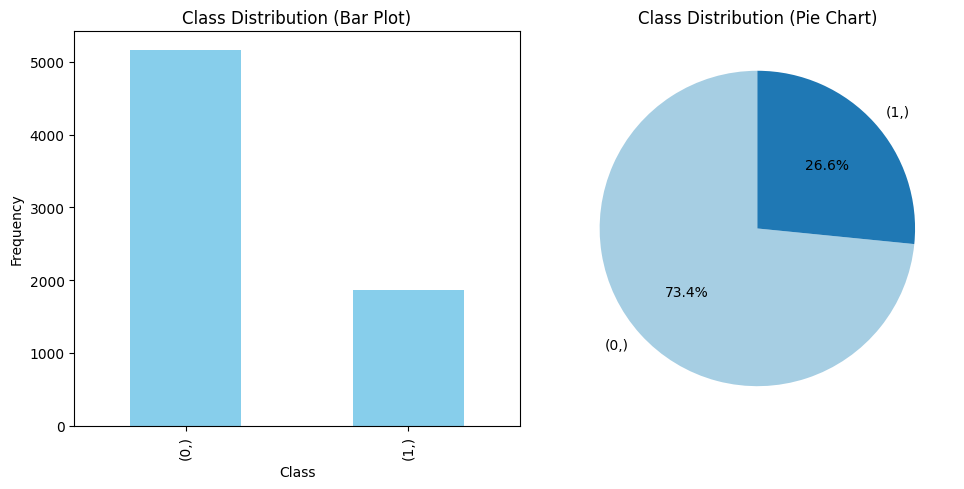

In [ ]:
visualise_class_distribution(label_counts)

## 2.7. Oversampling SMOTE

In previous step, we noticed a significant imbalance, with approximately 73.42% of samples belonging to the majority class (no churn) and only 26.58% to the minority class (churn).

This imbalance can negatively affect the performance of machine learning models, as they might become biased towards the majority class, leading to poor predictions for the minority class.

To address this issue, we apply Synthetic Minority Oversampling Technique (SMOTE) to generate synthetic samples for the minority class to balance the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
label_counts, label_percentages = imbalance_check(y)

Frequency of each class:
0
0    5163
1    5163
Name: count, dtype: int64

Percentage of each class:
0
0    50.0
1    50.0
Name: proportion, dtype: float64

There is no significant class imbalance.


After applying SMOTE, both classes have an equal representation of 50%, effectively mitigating the imbalance issue.

## 2.8. Splitting the dataset into the Training set & Test set

In [ ]:
y = np.ravel(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.9. Feature Scalling

We applied feature scaling to ensure that all input features contribute equally during the model training process. This was achieved using StandardScaler, which normalizes the feature values to have a mean of 0 and a standard deviation of 1.

By doing so, we ensure that features with different scales do not bias the learning process, particularly for algorithms sensitive to distance metrics.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#3. EDA

## Correlation Matrix (Top 10)

In [ ]:
data = X.copy()
data['Churn'] = y

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,1,29.85,29.85,True,...,False,False,False,False,False,False,False,True,False,0
1,1,0,0,0,34,1,0,56.95,1889.50,False,...,False,False,False,False,True,False,False,False,True,0
2,1,0,0,0,2,1,1,53.85,108.15,False,...,False,False,False,False,False,False,False,False,True,1
3,1,0,0,0,45,0,0,42.30,1840.75,True,...,False,False,False,False,True,False,False,False,False,0
4,0,0,0,0,2,1,1,70.70,151.65,False,...,False,False,False,False,False,False,False,True,False,1


In [ ]:
correlation_matrix = data.corr()

churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)

print("Top Features Correlated with Churn:")
print(churn_corr.head(10))

Top Features Correlated with Churn:
Churn                             1.000000
PaymentMethod_Electronic check    0.465495
InternetService_Fiber optic       0.388754
MonthlyCharges                    0.241951
StreamingTV_Yes                   0.167629
StreamingMovies_Yes               0.158284
MultipleLines_Yes                 0.154804
PaperlessBilling                  0.120956
DeviceProtection_Yes              0.025603
SeniorCitizen                     0.018404
Name: Churn, dtype: float64


In [ ]:
import seaborn as sns

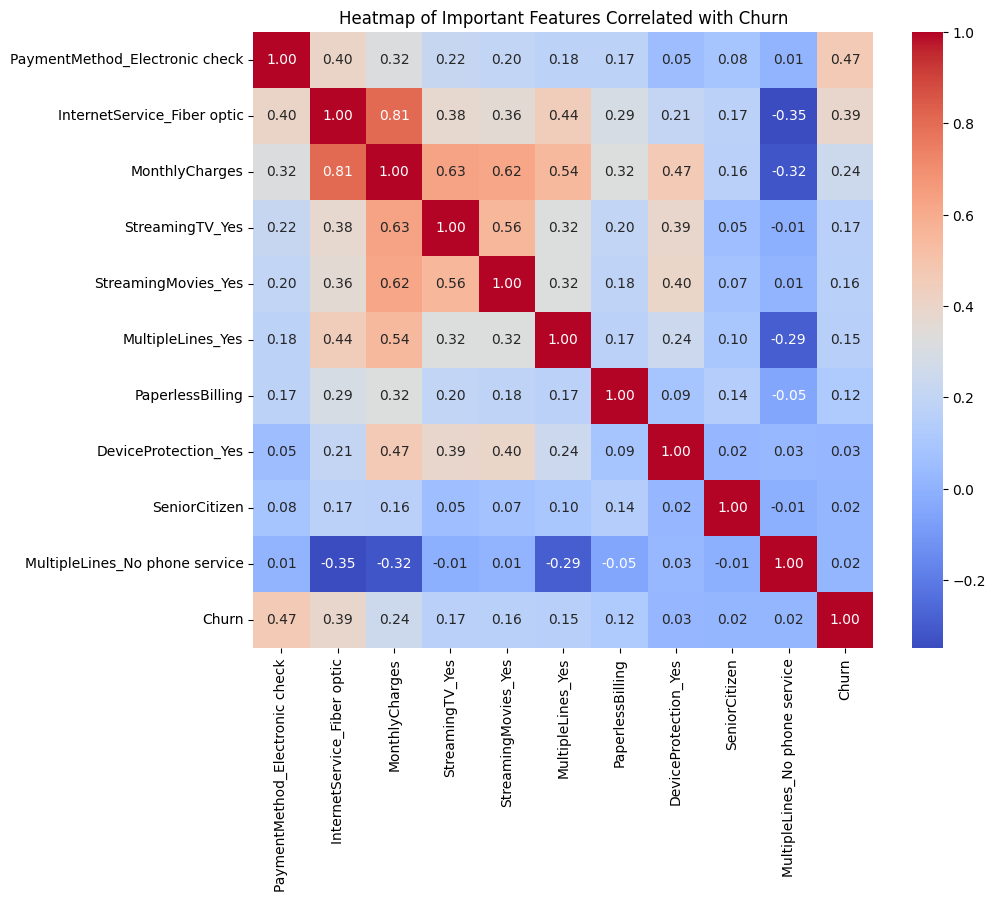

In [ ]:
important_features = churn_corr[1:11].index
# Heatmap for the most important features
plt.figure(figsize=(10, 8))
sns.heatmap(data[important_features.tolist() + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Important Features Correlated with Churn")
plt.show()

<b>PaymentMethod_Electronic check has the highest correlation with Churn</b>
- The correlation coefficient (0.47) shows that customers using the "Electronic check" payment method are more likely to churn. --> This could be due to the inconvenience or fees associated with this method.

**Fiber optic Internet services**

With a correlation coefficient (0.39), customers using **fiber optic Internet services** have a higher tendency to churn than other types of Internet services. --> This could be due to high costs or the experience not meeting customer expectations.

<b>MonthlyCharges</b>
- The correlation coefficient (0.24) shows that customers with higher monthly charges are more likely to churn. --> This could be due to dissatisfaction with the value of the service compared to the cost.

<b>StreamingTV_Yes & StreamingMovies_Yes</b>
- Services such as StreamingTV (0.17) and StreamingMovies (0.16) have lower correlations but still contribute to churn. --> This may be due to customers not feeling that the value of these entertainment services is worth the cost.

- InternetService_Fiber optic and MonthlyCharges have a high correlation (0.81), which suggests that monthly charges may be strongly influenced by the type of Internet service.

<b>Recommendations</b>
- Improve customer experience using "Electronic check": Simplify the checkout process or encourage switching to other payment methods (such as automation or card payments).

- Optimize Fiber optic service cost and quality: Check if there are any issues related to price or service performance that make customers dissatisfied.

## Some other insights

### Churn by Contract Type

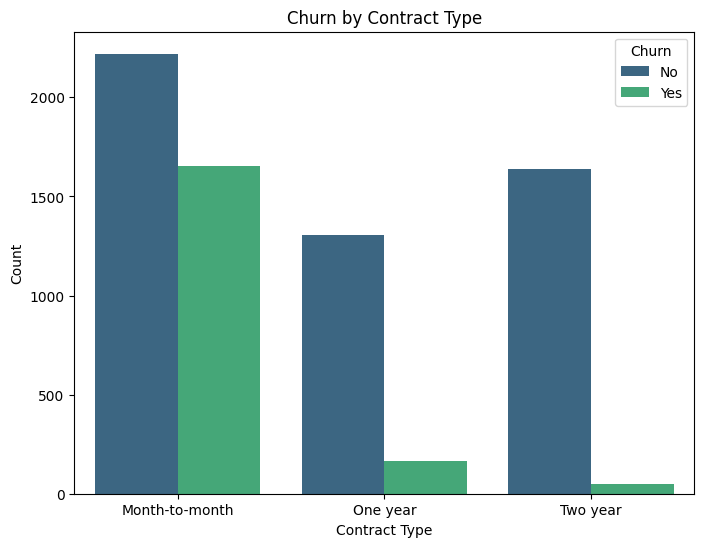

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()

Customers with month-to-month contracts show the highest churn rates compared to one-year or two-year contracts. This suggests that customers with less commitment are more likely to leave. --> *Encourage customers to switch to longer-term contracts by offering discounts or additional benefits.*

### Churn by Tenure

<ipython-input-44-5966c10ebadd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='viridis')


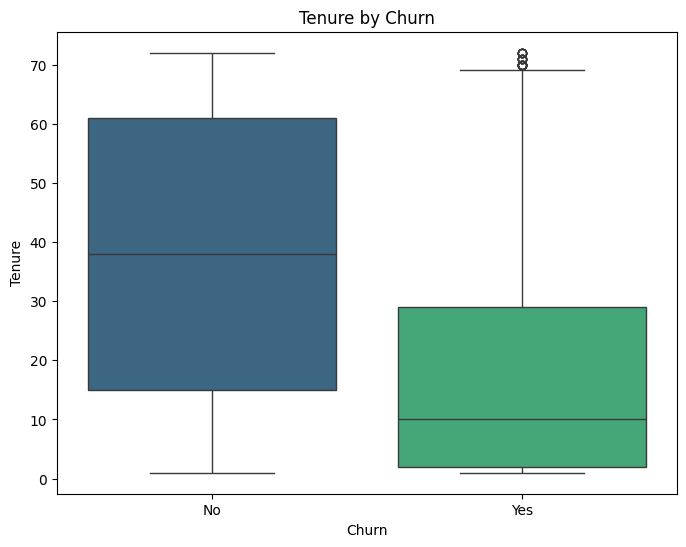

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette='viridis')
plt.title("Tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

Customers with shorter tenure (e.g., under 6 months) are significantly more likely to churn. Customers who have stayed longer are generally more loyal. --> *Create targeted engagement programs for new customers to improve their experience and encourage them to stay longer.*

### Churn by Online Security

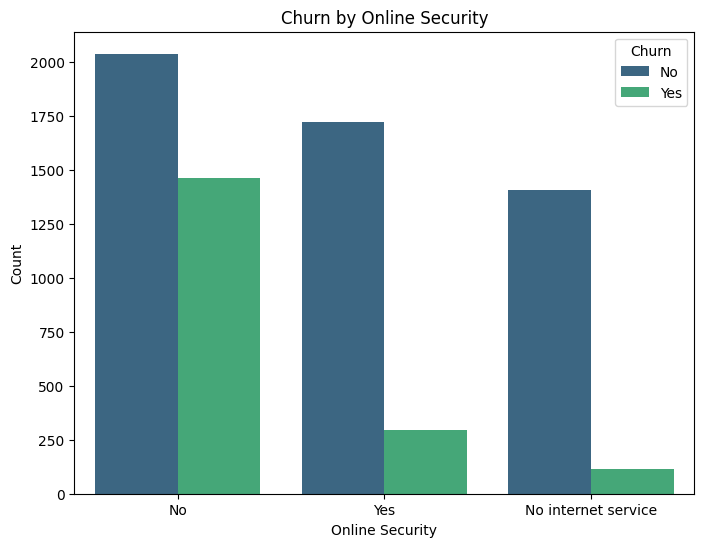

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='viridis')
plt.title("Churn by Online Security")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()

Customers who lack online security services are more likely to churn. This highlights the importance of bundled services in retaining customers. --> *Promote online security as part of a service bundle or offer it as an add-on to reduce churn.*

# 4. Different Model



##4.1 KNN

**Why we chose KNN:**

We chose K-Nearest Neighbors (KNN) because it is a simple yet powerful algorithm that performs well on classification problems, especially when the dataset size is manageable and the decision boundaries are not strictly linear. For the churn prediction task, KNN provides an intuitive way to leverage proximity-based relationships between customers, allowing us to predict churn based on similar historical patterns.

**How the KNN model works conceptually:**

KNN works by identifying the k closest data points in the feature space to a given instance and making predictions based on these neighbors. For classification, the algorithm uses majority voting from the neighbors to assign a class label.

The intuition behind KNN is straightforward: similar customers exhibit similar behavior. By considering features such as payment method, contract type, and monthly charges, we can determine whether a customer is likely to churn based on the behaviors of their closest "neighbors."

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to track the best accuracy and corresponding k
best_k = None
best_accuracy = 0

# Loop through values of k (n_neighbors)
for i in range(5, 30):
    # Initialize KNN with different k values
    knn_model = KNeighborsClassifier(n_neighbors=i)

    # Train the model
    knn_model.fit(X_train, y_train)

    # Make predictions
    predicted_y = knn_model.predict(X_test)

    # Calculate accuracy
    accuracy_knn = accuracy_score(y_test, predicted_y)

    # Check if the current accuracy is the highest so far
    if accuracy_knn > best_accuracy:
        best_accuracy = accuracy_knn
        best_k = i

# Print the best k and corresponding accuracy after the loop
print(f"Best k: {best_k}, Highest Accuracy: {best_accuracy:.4f}")

# Generate classification report
print(classification_report(y_test, predicted_y))

Best k: 14, Highest Accuracy: 0.8083
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1037
           1       0.76      0.86      0.81      1029

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066



### **Hyperparameter Tuning with GridSearchCV**

---

**How we tuned hyperparameters:**

To ensure optimal performance, we conducted hyperparameter tuning using Grid Search with 10-fold cross-validation. This allowed us to test various combinations of parameters systematically, ensuring that our model generalizes well. The parameters we optimized include:

- Number of neighbors (k): We tested odd values ranging from 5 to 30 to avoid ties in classification.
- Distance metric: We evaluated Minkowski, Euclidean, and Manhattan distances to identify the best way to measure similarity between data points.
- Weighting strategy: We compared uniform weights (where all neighbors contribute equally) and distance-based weights (where closer neighbors have more influence).
- Minkowski p parameter: We experimented with p=1 (Manhattan distance) and p=2 (Euclidean distance) to fine-tune the metric.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': range(5, 31, 2),  # Odd values of k from 5 to 30 to avoid ties
    'weights': ['uniform', 'distance'],  # Weighting strategy: equal or distance-based
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metrics to consider
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV for hyperparameter tuning with 10-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn_model,     # Base model
    param_grid=param_grid,   # Parameter grid to search
    cv=10,                   # 10-fold cross-validation
    scoring='accuracy',      # Optimize for accuracy
    n_jobs=-1                # Use all available CPU cores for parallel processing
)

# Train the model with the training data
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_  # Best parameter combination
best_accuracy = grid_search.best_score_  # Best accuracy from cross-validation

# Print the best parameters and the highest accuracy
print(f"Best Parameters: {best_params}")
print(f"Highest Accuracy from CV: {best_accuracy:.4f}")

# Use the best model to make predictions on the test set
best_knn_model = grid_search.best_estimator_  # Retrieve the best KNN model
predicted_y = best_knn_model.predict(X_test)  # Predict labels for the test set

# Generate a classification report for the test set
print("Classification Report on Test Data:")
print(classification_report(y_test, predicted_y))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Highest Accuracy from CV: 0.8137
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1037
           1       0.78      0.84      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



Before tuning, the KNN model utilized default parameters, which resulted in a test accuracy of approximately 78%. At this stage, the model relied on a simple distance metric (default: Minkowski with p=2, equivalent to Euclidean distance) and a default value for the number of neighbors (k), which might not have been optimal for our dataset.

The tuning process considered multiple distance metrics, including Minkowski (with p=1 and p=2), Manhattan, and Euclidean. The best-performing combination was Minkowski with p=1 (equivalent to Manhattan distance), which enhanced the model's ability to differentiate between data points in a way more suited to the distribution of our dataset.

After tuning, distance-based weights were selected (instead of uniform weights - treating all neighbors equally), allowing closer neighbors to have a greater influence on predictions. This adjustment improved the model’s handling of local patterns and edge cases.

##4.2 Naive Bayesian


**Why we chose Naive Bayes:**

We selected the Naive Bayes model because it is computationally efficient and works well with categorical data and features with a probabilistic relationship. Given the nature of the dataset, which includes both numerical and categorical features, Naive Bayes is a logical starting point for a baseline model in this classification problem.

**How the model works conceptually:**

Naive Bayes is based on Bayes' theorem, which calculates the probability of a class given a set of features. The key assumption here is that the features are conditionally independent given the class label (hence "naive"). This simplification allows the model to calculate probabilities efficiently, even with a large number of features.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Instantiate the Naive Bayes model
gnb = GaussianNB()

# Fit the model directly
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Import the necessary metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report

# Predict the test set results
y_pred = gnb.predict(X_test)

# Evaluate the model (accuracy, classification report, etc.)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.7270
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.57      0.68      1037
           1       0.67      0.89      0.76      1029

    accuracy                           0.73      2066
   macro avg       0.75      0.73      0.72      2066
weighted avg       0.75      0.73      0.72      2066



**Hyperparameter tunning**

---

**How we tuned hyperparameters:**

We used the *var_smoothing* parameter to fine-tune the model. This parameter adjusts the variance of each feature by adding a small value, which helps handle numerical instabilities and prevents probabilities from becoming zero. We applied grid search with cross-validation to evaluate different values for *var_smoothing*, ensuring that the model generalizes well to unseen data.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the model
gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Range of smoothing values
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Use the best estimator to predict the test set results
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

# Evaluate the model (accuracy, classification report, etc.)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score: 0.7229
Accuracy: 0.7270
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.57      0.68      1037
           1       0.67      0.89      0.76      1029

    accuracy                           0.73      2066
   macro avg       0.75      0.73      0.72      2066
weighted avg       0.75      0.73      0.72      2066



**Results after tuning:**

- Baseline Accuracy (Before Tuning): 72.70%
- Accuracy After Tuning: 72.29% (cross-validation)
---> The tuning did *not significantly improve* accuracy.


The lack of improvement after tuning the Naive Bayes model can be attributed to its fundamental assumptions, particularly the independence assumption, which is often violated in real-world datasets where features are correlated. Additionally, the var_smoothing parameter primarily addresses numerical stability but does not resolve the model's inability to capture complex feature relationships.

##4.3 ANN


**Why we chose ANN:**

We selected the Artificial Neural Network (ANN) model due to its strong capability in handling complex relationships within data. ANN is particularly well-suited for binary classification tasks like churn prediction, where patterns may be nonlinear or hidden within the feature set.

**How the ANN model works conceptually:**

The ANN model consists of three layers:

- Input Layer: Receives the input data, in this case, the selected features.
- Hidden Layers: Processes the data through neurons with activation functions (ReLU) that introduce non-linearity. These layers learn intermediate representations.
- Output Layer: Outputs the probability of each class (0 or 1) using a sigmoid activation function for binary classification.

The model is trained by minimizing the binary cross-entropy loss, using the Adam optimizer, which adapts the learning rate dynamically for efficient convergence.

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
import random
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

def default_ann_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='tanh', input_shape=(input_shape,)),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = X_train.shape[1]
model = default_ann_model(input_shape)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

In [ ]:
model.summary()

Model: "sequential_273"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_819 (Dense)                    │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_820 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_821 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8156


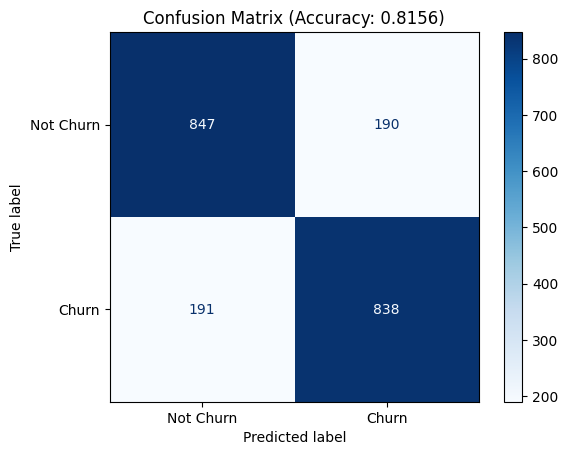

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.4f})")
plt.show()

### **Hyperparameter Tunning**
---

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import numpy as np

# Define a function to create and compile the ANN model
def create_ann(learning_rate, num_neurons, activation):
    model = models.Sequential([
        layers.Dense(num_neurons, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(num_neurons // 2, activation=activation),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01],
    'num_neurons': [32, 64],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# K-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
best_accuracy = 0
best_params = {}
for lr in param_grid['learning_rate']:
    for neurons in param_grid['num_neurons']:
        for activation in param_grid['activation']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"Testing: LR={lr}, Neurons={neurons}, Activation={activation}, Batch={batch_size}, Epochs={epochs}")

                    fold_accuracies = []  # Store accuracies for each fold
                    for train_index, test_index in kf.split(X_train):
                        # Split the data into train and test for the current fold
                        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
                        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

                        # Create and train the model
                        model = create_ann(lr, neurons, activation)
                        early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
                        model.fit(
                            X_train_fold, y_train_fold,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            callbacks=[early_stopping]
                        )

                        # Evaluate the model on the test set for this fold
                        loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=0)
                        fold_accuracies.append(accuracy)

                    # Calculate the mean accuracy for this hyperparameter combination
                    mean_accuracy = np.mean(fold_accuracies)

                    if mean_accuracy > best_accuracy:
                        best_accuracy = mean_accuracy
                        best_params = {
                            'learning_rate': lr,
                            'num_neurons': neurons,
                            'activation': activation,
                            'batch_size': batch_size,
                            'epochs': epochs
                        }
                        best_model = model

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with the Best Model: {test_accuracy:.4f}")

Testing: LR=0.001, Neurons=32, Activation=relu, Batch=16, Epochs=10
Testing: LR=0.001, Neurons=32, Activation=relu, Batch=16, Epochs=20
Testing: LR=0.001, Neurons=32, Activation=relu, Batch=32, Epochs=10
Testing: LR=0.001, Neurons=32, Activation=relu, Batch=32, Epochs=20
Testing: LR=0.001, Neurons=32, Activation=tanh, Batch=16, Epochs=10
Testing: LR=0.001, Neurons=32, Activation=tanh, Batch=16, Epochs=20
Testing: LR=0.001, Neurons=32, Activation=tanh, Batch=32, Epochs=10
Testing: LR=0.001, Neurons=32, Activation=tanh, Batch=32, Epochs=20
Testing: LR=0.001, Neurons=64, Activation=relu, Batch=16, Epochs=10
Testing: LR=0.001, Neurons=64, Activation=relu, Batch=16, Epochs=20
Testing: LR=0.001, Neurons=64, Activation=relu, Batch=32, Epochs=10
Testing: LR=0.001, Neurons=64, Activation=relu, Batch=32, Epochs=20
Testing: LR=0.001, Neurons=64, Activation=tanh, Batch=16, Epochs=10
Testing: LR=0.001, Neurons=64, Activation=tanh, Batch=16, Epochs=20
Testing: LR=0.001, Neurons=64, Activation=tanh, 

##4.4 Logistic Regression

**Why we chose Logistic Regression:**

We selected Logistic Regression as one of the models for our classification problem because of its simplicity, interpretability, and strong performance on linear decision boundaries. It is particularly well-suited for binary classification problems such as churn prediction.

**How the Logistic Regression model works conceptually:**

Logistic Regression works by estimating the probability of a class belonging to either 0 or 1 using the sigmoid function. It assumes a linear relationship between the independent variables and the log-odds of the dependent variable. By applying a threshold (e.g., 0.5), the model classifies predictions into the binary classes.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model using the preprocessed training data
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8243
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1037
           1       0.82      0.82      0.82      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



### **Hyperparameter Tunning**
---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 1000]
}


# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available cores
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8121
Test Accuracy: 0.8253
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1037
           1       0.82      0.83      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



Before tuning, the Logistic Regression model achieved a test accuracy of 0.8243 with default parameters. After tuning, the accuracy slightly improved to 0.8253, demonstrating marginal performance gains. However, this indicates that the model was already performing near its optimal capacity with the default settings.

The minor improvement in accuracy post-tuning suggests that Logistic Regression effectively captures the patterns in the dataset but may have reached its ceiling due to the dataset's characteristics.

## 4.5 Random Forest


**Why we chose Random Forest (RF):**

We chose Random Forest because it is a versatile and robust machine learning algorithm that excels at classification tasks, especially when dealing with a mix of numerical and categorical features. Additionally, Random Forest is less prone to overfitting compared to individual decision trees due to its ensemble approach, which combines predictions from multiple trees to improve generalization.

**How the Random Forest model works conceptually:**

Random Forest is an ensemble learning method that builds multiple decision trees during training and aggregates their predictions for classification. Each tree in the forest is trained on a random subset of the training data, and at each split, a random subset of features is considered, introducing diversity among the trees. For classification, the final prediction is based on the majority vote from all the trees in the forest. The intuition behind Random Forest is that combining the decisions of many "weak learners" (decision trees) produces a "strong learner" with better accuracy and reduced variance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the preprocessed training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8349
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1037
           1       0.84      0.83      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



### **Hyperparameter Tunning**
---

**How we tuned hyperparameters:**

To maximize the performance of the Random Forest model, we performed hyperparameter tuning using Grid Search with 3-fold cross-validation. This approach allowed us to systematically explore combinations of parameters and identify the optimal settings. The parameters tuned include:

- Number of estimators (n_estimators): The number of trees in the forest. We tested values of 50, 100, and 200.
- Maximum depth (max_depth): The maximum depth of each tree. We experimented with values of None, 10, 20, and 30.
- Minimum samples split (min_samples_split): The minimum number of samples required to split an internal node. We tested values of 2, 5, and 10.
- Minimum samples leaf (min_samples_leaf): The minimum number of samples required to be at a leaf node. We tested values of 1, 2, and 4.
- Criterion (criterion): The function used to measure the quality of a split. We evaluated both gini and entropy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict with the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.8436
Test Set Accuracy: 0.8354
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1037
           1       0.83      0.84      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



**Tuned Parameters (via Grid Search):**
- n_estimators: 50 (The number of trees was reduced from 100 to 50, lowering training time while maintaining performance).
- max_depth: 20 (Tree depth was limited to 20 to avoid overfitting and reduce model complexity).
- min_samples_split: 2 (Remained unchanged, requiring at least 2 samples to split a node).
- min_samples_leaf: 1 (Remained unchanged, allowing leaves to contain a single sample).
- criterion: 'gini' (Remained unchanged, continuing to use the Gini index for splitting).





# 5. Comparision & Business Impact

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate
data = {
    "Model": ["Logistic Regression", "Random Forest", "Artificial Neural Networks",
              "K-Nearest Neighbors", "Naive Bayes"],
    "Accuracy (%)": [82.53, 83.54, 82.09, 80.05, 72.70],
    "Computation Time (seconds)": [19, 8 * 60 + 8, 29 * 60, 3 * 60 + 2, 0]
}

df2 = pd.DataFrame(data)
print(tabulate(df2, headers='keys', tablefmt='grid'))

+----+----------------------------+----------------+------------------------------+
|    | Model                      |   Accuracy (%) |   Computation Time (seconds) |
+====+============================+================+==============================+
|  0 | Logistic Regression        |          82.53 |                           19 |
+----+----------------------------+----------------+------------------------------+
|  1 | Random Forest              |          83.54 |                          488 |
+----+----------------------------+----------------+------------------------------+
|  2 | Artificial Neural Networks |          82.09 |                         1740 |
+----+----------------------------+----------------+------------------------------+
|  3 | K-Nearest Neighbors        |          80.05 |                          182 |
+----+----------------------------+----------------+------------------------------+
|  4 | Naive Bayes                |          72.7  |                        

In the process of constructing and evaluating classification models based on the provided dataset, we utilized five models: Logistic Regression, Random Forest (RF), K-Nearest Neighbors (KNN), Naive Bayes (NB), and Artificial Neural Networks (ANN). Based on the results obtained, each model was evaluated according to the following criteria: *accuracy*, *computation time*, *interpretability*, and *business applicability*.

---

### **1. Logistic Regression**
Logistic Regression achieved an accuracy of **82.53%** with a processing time of only **19 seconds**. This model is well-suited when a balance between accuracy and processing speed is required. Additionally, Logistic Regression is transparent and easy to understand, making it particularly suitable for problems that require explaining influencing factors or persuading stakeholders. With its high efficiency and practical applicability, Logistic Regression is considered one of the optimal choices for this dataset.

---

### **2. Random Forest (RF)**
The Random Forest model achieved an accuracy of **83.54%,** slightly higher than Logistic Regression. However, the processing time for Random Forest was significantly longer, taking approximately **8 minutes and 8 seconds.** As an ensemble model, Random Forest captures complex relationships in the data and provides insights into feature importance, which is valuable for understanding key drivers of customer behavior. Additionally, Random Forest is less prone to overfitting compared to single decision trees. While its accuracy is slightly better than Logistic Regression, the longer processing time makes it less efficient for real-time applications. Random Forest is best suited for tasks where interpretability is secondary to accuracy and when computation time is not a limiting factor.

---

### **3. Artificial Neural Networks (ANN)**
The Artificial Neural Networks (ANN) model achieved an accuracy of **82.09%,** nearly equivalent to that of Logistic Regression. However, its processing time was significantly longer (**29 minutes**), reducing its efficiency for tasks requiring quick computations. Moreover, as a "black-box" model, interpreting its results is challenging, which can hinder transparency and complicate practical application, particularly when results need to be explained to stakeholders.

---

### **4. K-Nearest Neighbors (KNN)**
The K-Nearest Neighbors (KNN) model achieved an accuracy of **80.05%,** slightly lower than that of Logistic Regression, while its processing time was relatively long (**3 minutes and 2 seconds**). This indicates that KNN is not the optimal choice for our problem, as it lacks the efficiency and accuracy required for this task.

---

### **5. Naive Bayes (NB)**
The Naive Bayes model had the lowest accuracy (**72.70%**) among the tested models. Although its processing time was very fast (**almost 0 seconds**), the model's major drawback lies in its assumption of feature independence, which is unrealistic for datasets with high correlations among features. Therefore, we do not consider this model to be the best choice for this problem.

---

When considering accuracy, speed, transparency, and practical applicability, **Logistic Regression** remains the most balanced choice for this dataset. However, if slightly higher accuracy is prioritized and longer computation time is acceptable, **Random Forest** emerges as a competitive alternative, offering better interpretability of feature importance. Both models are strong candidates depending on the specific needs of the application.

## Why do Logistic Regression and Random Forest outperform the other models?

Based on the dataset analysis, we conclude that Logistic Regression achieved the highest accuracy (82.53%) due to its compatibility with the characteristics of the data.

The dataset includes several numerical features such as MonthlyCharges, TotalCharges, and tenure (service usage duration), which exhibit a near-linear relationship with the probability of customer churn. For instance, customers with shorter service durations or higher monthly fees are more likely to churn. Logistic Regression leverages this linearity effectively, making it a strong performer. Similarly, Random Forest is highly effective in capturing complex patterns and interactions between these features while maintaining robust performance.

Naive Bayes, however, assumes feature independence, which is unrealistic for this dataset where certain features, such as InternetService, OnlineSecurity, and TechSupport, have strong correlations with each other. This results in poor performance for Naive Bayes in this scenario.

The dataset is neither overly complex nor highly nonlinear, which explains why Logistic Regression performs well compared to models like ANN or KNN. Additionally, ANN tends to overfit when data lacks sufficient diversity or when feature relationships are relatively straightforward. On the other hand, Random Forest excels in balancing accuracy and robustness by effectively handling both linear and nonlinear relationships in the dataset, as evidenced by its slightly higher accuracy than Logistic Regression.

In summary, both Logistic Regression and Random Forest stand out as the most suitable models for this dataset, with Logistic Regression offering simplicity and speed, while Random Forest provides slightly better accuracy and feature interpretability at the cost of longer computation time.

LR and RF can be effectively deployed in a real-world business environment, particularly in a customer retention system. The deployment process would involve integrating the model into the company's customer relationship management (CRM) platform or analytics pipeline. They can be deployed as a real-time scoring system. For each customer, the model calculates the probability of churn. Customers with a high churn probability (e.g., greater than 0.7) are flagged as at-risk.The flagged customers can be automatically added to a retention campaign. Marketing teams could send personalized offers, service upgrades, or loyalty benefits to these customers to reduce churn rates.

LR and RF can also support other business decisions:

- Pricing Strategy: By identifying price-sensitive customers who are likely to churn, businesses can offer tailored discounts.
- Sales Forecasting Dashboard: The model’s outputs can be integrated into dashboards, helping sales teams prioritize retention efforts and forecast revenue based on predicted churn.

## Random Forest important features

Top 10 Most Important Features:
                           Feature  Importance
8                     TotalCharges    0.169847
4                           tenure    0.145648
7                   MonthlyCharges    0.131546
28  PaymentMethod_Electronic check    0.101123
11     InternetService_Fiber optic    0.059529
26               Contract_Two year    0.036017
2                          Partner    0.035022
3                       Dependents    0.030532
10               MultipleLines_Yes    0.022594
0                           gender    0.021856


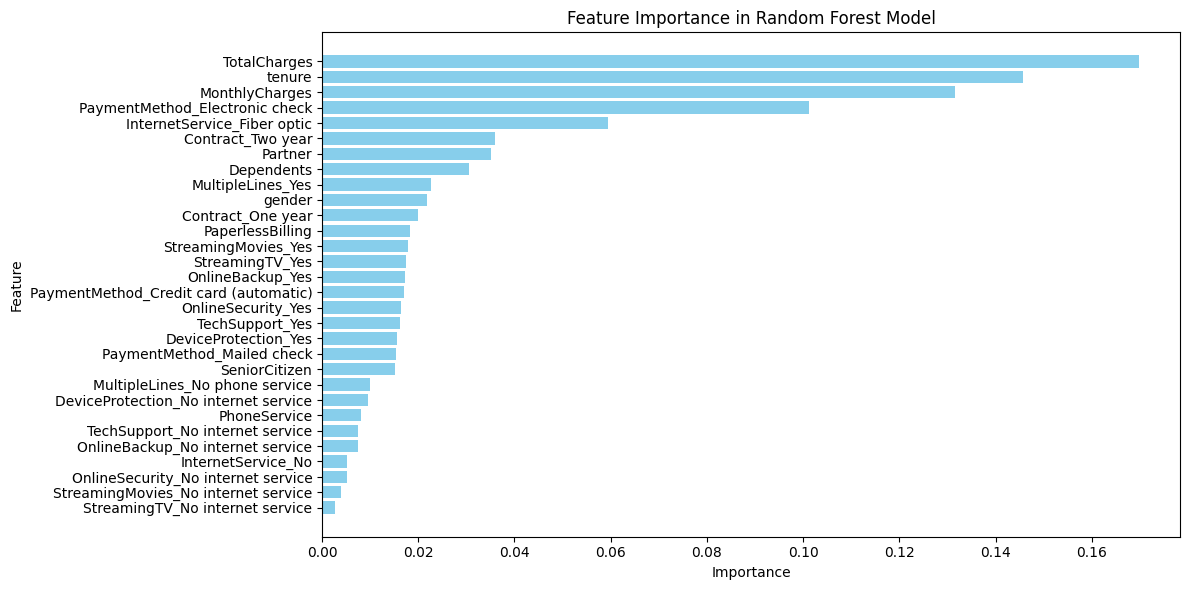

In [ ]:
# Extract feature importance from the best model
feature_importances = best_rf_model.feature_importances_

# Get feature names from the training data (X_train)
feature_names = X.columns

# Create a DataFrame to store feature importance values
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = data.corr()

churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)

print("Top Features Correlated with Churn:")
print(churn_corr.head(10))

Top Features Correlated with Churn:
Churn                             1.000000
PaymentMethod_Electronic check    0.465495
InternetService_Fiber optic       0.388754
MonthlyCharges                    0.241951
StreamingTV_Yes                   0.167629
StreamingMovies_Yes               0.158284
MultipleLines_Yes                 0.154804
PaperlessBilling                  0.120956
DeviceProtection_Yes              0.025603
SeniorCitizen                     0.018404
Name: Churn, dtype: float64


In [ ]:
# Data for comparison
data1 = {
    "Feature": [
        "TotalCharges", "tenure", "MonthlyCharges", "PaymentMethod_Electronic check",
        "InternetService_Fiber optic", "Contract_Two year", "StreamingTV_Yes", "SeniorCitizen"
    ],
    "Random Forest Importance": [
        0.169847, 0.145648, 0.131546, 0.101123,
        0.059529, 0.036017, None, None
    ],
    "Correlation Coefficient": [
        None, None, 0.241951, 0.465495,
        0.388754, None, 0.167629, 0.018404
    ],
    "Remarks": [
        "Strongly non-linear relationship.",
        "Captured well by Random Forest.",
        "Highlighted by both methods.",
        "Strong agreement between methods.",
        "Strong agreement between methods.",
        "Captured better by Random Forest.",
        "Significant only in Correlation Matrix.",
        "Insignificant in both methods."
    ]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data1)

# Display the DataFrame
df_comparison.style.set_caption("Feature Importance Comparison")

,Feature,Random Forest Importance,Correlation Coefficient,Remarks
0,TotalCharges,0.169847,nan,Strongly non-linear relationship.
1,tenure,0.145648,nan,Captured well by Random Forest.
2,MonthlyCharges,0.131546,0.241951,Highlighted by both methods.
3,PaymentMethod_Electronic check,0.101123,0.465495,Strong agreement between methods.
4,InternetService_Fiber optic,0.059529,0.388754,Strong agreement between methods.
5,Contract_Two year,0.036017,nan,Captured better by Random Forest.
6,StreamingTV_Yes,nan,0.167629,Significant only in Correlation Matrix.
7,SeniorCitizen,nan,0.018404,Insignificant in both methods.


**Nonlinear features (e.g., TotalCharges, tenure):**

Random Forest captures these features better than Correlation Matrix. *TotalCharges* is the most important feature according to Random Forest but is not emphasized in Correlation Matrix. *tenure* is also highly valued by Random Forest but is not included in Correlation Matrix's important feature list.

**Linear features (e.g., PaymentMethod_Electronic check, InternetService_Fiber optic):**

These features are emphasized in both methods. *PaymentMethod_Electronic* check and *InternetService_Fiber* optic are highly correlated and are considered important by Random Forest.

# 6. Ensemble Learning

In [ ]:
!pip install scikeras


In [ ]:
!pip install tensorflow keras


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

# 2. ANN Model
def build_ann_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
ann = KerasClassifier(model=build_ann_model, epochs=5, batch_size=32, verbose=0)

# Ensemble Learning (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('ann', ann)],
    voting='hard'
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)

# Accuracy và Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ensemble Model Accuracy: 0.8156
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82      1037
           1       0.84      0.78      0.81      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

# 1. Define the optimized ANN model with best parameters
def build_ann_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

ann = KerasClassifier(model=build_ann_model, epochs=20, batch_size=32, verbose=0)

# 2. Optimized KNN
knn = KNeighborsClassifier(n_neighbors=11, weights='distance', metric='minkowski', p=1)

# 3. Optimized Naive Bayes
nb = GaussianNB(var_smoothing=1e-9)

# 4. Optimized Logistic Regression
lr = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# 5. Optimized Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=2,
                             min_samples_leaf=1, criterion='gini', random_state=42)

# 6. Ensemble Learning (Voting Classifier)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('ann', ann)
    ],
    voting='soft'  # Use soft voting for probabilistic weighting
)

# Fit the Ensemble model
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the Ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ensemble Model Accuracy: 0.8349
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1037
           1       0.84      0.83      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

